# Final Project Part 3
**Names/PIDs :**  
* Sowmya Ranga, mya1895
    * Sowmya worked on putting together the final files for each submission. She worked primarily on analyzing the 
     what role the websites play into this. She looked at who each person was sending an email to and if the emails 
     were sent at odd times or to any odd people. She filtered through which emails were sent to non-DTAA employees.    Additionally, she looked at if the people with a higher role in the company had any suspicious behavior. 
     
* Jagrit Behl, jaib97
    * Jai worked on looking at mainly the http data and what pattern the employees csv file had. He worked on putting together a list of websites that were most visited and then filtering out them out to look at what odd websites were visited by all the employees; this didn't really lead to a conclusion. He looked at if there was an oddity in the attachment sizes. After the group was able to come up with suspects, he looked at any odd information from all csv files regarding the suspects. 
* Ronnie Fesco, ronnief1
    * Ronnie worked with data visualization and putting together the set of people that could be suspects. Through looking at different plots, he was able to come to a conclusion that we should start looking at the odd times that peple were visiting their computers (logon and device connects). He then looked at suspicious activies in each data set regarding these individuals to try to come up with a conclusion. 

In [25]:
import pandas
import numpy
import matplotlib.pyplot as plt # need this import to get colors and other matplot features
%matplotlib inline
email = pandas.read_csv('email_info.csv')
http = pandas.read_csv('http_info.csv')
device = pandas.read_csv('device_info.csv')
employee = pandas.read_csv('employee_info.csv')
logon = pandas.read_csv('logon_info.csv')

## Who?

### Fired Employees

*We started our deeper analysis of the data by examining the monthly records of employees and narrowed in on employee who may have been fired or left the company. These people may have done something to get fired or left the company with ulterior motives.* 

The employees each month decrease as more people are fired but no new employees are hired.


In [4]:
employee.groupby('month').size().sort_values(ascending = False)

month
5/1/17     980
6/1/17     973
7/1/17     966
8/1/17     962
9/1/17     959
10/1/17    952
11/1/17    944
dtype: int64

Here's a list of these potentially fired employees:

In [7]:
e = employee.groupby('employee_name').size().sort_values(ascending = True) 
efired = e[e < 7]
efired

employee_name
Sonia Nerea Love            1
Garrison George Guerrero    1
Ruth Daphne Carver          1
Chris L North               1
Hanae Rhiannon Lindsey      1
Dominic Zeph Johns          1
Halee Autumn Craft          1
Carson Caesar Olson         2
Ima Quintessa Williams      2
Philip Isaiah Best          2
Kenyon Arthur Kent          2
Giacomo Hamilton Giles      2
Whilemina Shafira Perry     2
Scarlett Kerry Charles      2
Chaney Sean Fuentes         3
Lucian Rajah Lloyd          3
Palmer Ahmed Sutton         3
Lillith Chanda Delgado      3
Justine Amy Lara            4
Paki Jason Emerson          4
Noah Perry Bolton           4
Chancellor Cody Douglas     5
Cedric Cyrus Harrison       5
Levi Keegan Foley           5
Jada Quinn Vang             5
Kelly Hashim Carr           5
Denise Serina Le            5
Martin Jonathan Martin      5
Megan Brynn Snyder          6
Francesca Kylie Russo       6
Shellie Medge Jefferson     6
Damon Hyatt Boyle           6
Simone Amber Owens        

### Suspicious Activity?

*After narrowing down a list of people we thought were possible suspects, we began to look for suspicious activity by them that could have caused them to leave the company*

Some things we investigated were the times at which they were logging on, connecting devices, and/or emailing others. We determined that activity outside a typical work day of 6am-8pm (06-20) was significant.

In [51]:
# Off hour connects

device['hour'] = device.date.apply(lambda t: t.split()[1].split(':')[0])
#device['hour'] = device.date.apply()
device.hour = [int(m) for m in device.hour]
device.hour = pandas.DataFrame(device.hour)
s = device[device['hour'] < 6]
d = device[device['hour'] > 20]
offhourconnects = s.append(d)
cts = offhourconnects[offhourconnects['activity'] == 'Connect']
cts 

,id,date,user,pc,activity,hour
0,{I2V5-T9ZT91EI-5555HLGW},5/1/2017 1:58,CJP0221,PC-5941,Connect,1
1647,{U8D7-M0KH81LR-8182GNJC},5/4/2017 2:07,YXG0504,PC-4312,Connect,2
2805,{N4B9-K5AG06VE-9626ECBG},5/5/2017 1:35,WSP0210,PC-0583,Connect,1
6197,{D8Q5-X5BC91CE-3225CNNB},5/8/2017 0:25,TDB0268,PC-8284,Connect,0
6199,{Q7W7-B0PH08AL-8634FWKU},5/8/2017 0:39,TDB0268,PC-8284,Connect,0
6200,{N6D8-U1VN15ZB-6937GTDJ},5/8/2017 0:47,XBW0181,PC-8353,Connect,0
6202,{Q3Z1-N9IA48OI-8297NAJX},5/8/2017 1:31,JDH0545,PC-1541,Connect,1
6204,{J8A1-H4XI90ZR-0684KSDK},5/8/2017 1:38,CJP0221,PC-5941,Connect,1
6208,{M7S9-P8TD87LK-1402URLQ},5/8/2017 2:20,CJP0221,PC-5941,Connect,2
6209,{H0H1-B7MA39AD-7022OEXN},5/8/2017 2:25,XBW0181,PC-8353,Connect,2


In [23]:
# Off hour emails

email['hour'] = [m[11:13] for m in email.date]
email.hour = [int(m) for m in email.hour]
email.hour = pandas.DataFrame(email.hour)
gs = email[email['hour'] < 6]
sd = email[email['hour'] > 20]
offhouremail = gs.append(sd)
offhouremail

,id,date,to,from,size,attachments,hour
14880,{R9O9-P0MA25PE-4425NINA},05/08/2017 00:12:26,Timothy.Deacon.Bates@dtaa.com,Xander.Byron.Walter@dtaa.com,45472,3,0
14881,{Y7B0-C3MI02MH-1627OUOT},05/08/2017 05:20:40,Lillian.Sarah.Porter@hp.com,Craig.Duncan.Moreno@dtaa.com,30975,0,5
24006,{X0N3-K6ZF86MG-5753VWNI},05/13/2017 01:43:25,Jerry.Vincent.Shepherd@dtaa.com,Whilemina.Shafira.Perry@dtaa.com,33451,0,1
24007,{J5V5-K9NZ62VI-9354EWAU},05/13/2017 03:14:25,Zachery.Ashton.Stewart@dtaa.com,Christopher.Murphy.Dodson@dtaa.com,25585,0,3
38525,{R1R4-V8QN37WD-9507GUGF},05/20/2017 01:10:39,Curran.Nolan.Carney@dtaa.com,Christopher.Murphy.Dodson@dtaa.com,33229,0,1
44493,{X6A4-A8HX56HO-2481TEQS},05/22/2017 01:38:42,Wendy.Stacy.Norman@dtaa.com,Whilemina.Shafira.Perry@dtaa.com,38412,0,1
65416,{I2F8-B5JT07HD-2324TRMX},06/03/2017 04:30:51,Baker.Vladimir.Wells@dtaa.com,Jameson.Orlando.Sosa@dtaa.com,31928,0,4
85810,{J6R6-V0HO89SS-9770HLXF},06/13/2017 04:55:47,Curran.Nolan.Carney@dtaa.com,Christopher.Murphy.Dodson@dtaa.com,24262,0,4
88738,{I0S5-O6VC23CT-1758APLL},06/15/2017 00:04:45,Octavius.Evan.Henderson@dtaa.com,Thomas.Ryder.Wolfe@dtaa.com,31039,0,0
99952,{M1I2-B7PX92XV-1276NZAH},06/19/2017 04:17:07,Laith.Griffith.Livingston@dtaa.com;Ross.Tanner...,Melyssa.Deborah.Spence@dtaa.com,27161,0,4


In [26]:
# Off hour logons
 
logon['hour'] = logon.date.apply(lambda t: t.split()[1].split(':')[0])
logon.hour = [int(m) for m in logon.hour]
logon.hour = pandas.DataFrame(logon.hour)
gsd = logon[logon['hour'] < 6]
sdf = logon[logon['hour'] > 20]
offhourlogins = gsd.append(sdf)
offhourlogins

,id,date,user,pc,activity,hour
0,{K8A8-I1AQ11TY-7196UJHA},5/1/2017 1:23,CJP0221,PC-5941,Logon,1
1,{S3C5-M7TU17OX-7669DAXE},5/1/2017 1:26,MDS0121,PC-8374,Logoff,1
2,{T7N1-I7WL82DR-7030FPGD},5/1/2017 1:52,HMD0974,PC-1182,Logon,1
3,{J0N0-P3IC26YQ-5468CCLR},5/1/2017 2:11,SLC0113,PC-1851,Logon,2
4,{H5O1-F5SI20WW-0774IILV},5/1/2017 2:15,JAO0817,PC-0583,Logoff,2
5,{Q4Y5-F5IL58JP-1044LYKY},5/1/2017 2:32,TJR0895,PC-1413,Logoff,2
6,{F4U4-E0UI82LQ-8119AMMC},5/1/2017 3:12,CJP0221,PC-5941,Logoff,3
7,{P9Z0-Y4RZ63HY-0768IYMZ},5/1/2017 3:22,SLC0113,PC-1851,Logoff,3
8,{O0I4-I1HB68CO-4104OZPU},5/1/2017 3:32,DWG0209,PC-9532,Logon,3
9,{F1O2-K9TW49XY-4608HUOH},5/1/2017 3:42,DWG0209,PC-9532,Logoff,3


In [56]:
# Off hour web-browsing

http['site'] = http.url.apply(lambda t: (t.split('/'))[2])
http['hour'] = http.date.apply(lambda t: int(t.split()[1].split(':')[0]))
gsd = http[http['hour'] < 6]
sdf = logon[http['hour'] > 20]
offhourhttp = gsd.append(sdf)
offhourhttp

C:\Users\sowmy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity,date,hour,id,pc,site,url,user
0,NaN,5/1/2017 0:00,0,{Y1V0-L9KP13HO-2886FNBQ},PC-8374,yahoo.com,http://yahoo.com/Armillaria_luteobubalina/mont...,MDS0121
1,NaN,5/1/2017 0:35,0,{J8C2-W3PL21WD-1786TWQY},PC-0583,instagr.am,http://instagr.am/1955_MacArthur_Airport_Unite...,JAO0817
2,NaN,5/1/2017 1:02,1,{Y8Q3-W0WO94DN-1072IWFA},PC-0583,reference.com,http://reference.com/Achtung_Baby/u2s.html,JAO0817
3,NaN,5/1/2017 3:03,3,{W5H5-N4HW07MA-1950QCOZ},PC-5941,target.com,http://target.com/Dungeons__Dragons/gygax.html,CJP0221
4,NaN,5/1/2017 3:06,3,{V3H3-O1WG29GS-8147SAJB},PC-1851,foodnetwork.com,http://foodnetwork.com/1955_MacArthur_Airport_...,SLC0113
5,NaN,5/1/2017 3:12,3,{P4P8-K7ZC85EU-3559TSQU},PC-1851,toysrus.com,http://toysrus.com/1994_Atlantic_hurricane_sea...,SLC0113
6,NaN,5/1/2017 3:13,3,{Z0P7-A9QX52PK-3761TDMK},PC-9974,youtube.com,http://youtube.com/2004_World_Series/varitek.html,WMH0866
7,NaN,5/1/2017 4:59,4,{F3W5-M6LJ91GN-9315XVER},PC-6480,hootsuite.com,http://hootsuite.com/Mercury_planet/antoniadis...,LHC0329
8,NaN,5/1/2017 5:40,5,{O9D3-H8SR07MC-1436KREP},PC-8529,expedia.com,http://expedia.com/1964_Brinks_Hotel_bombing/b...,ASN0508
9,NaN,5/1/2017 5:53,5,{N4H9-Z8HV04NE-5299CBMO},PC-8529,cnet.com,http://cnet.com/2000_Sri_Lanka_cyclone/thoothu...,ASN0508


Which users were connecting the most off hours?

In [28]:
usr = cts.groupby('user').size().sort_values(ascending = False)
usr

user
AYN0502    58
WHC0684    54
CJP0221    53
TDB0268    42
XBW0181    29
AJM0772    29
YXG0504    25
RKS0170    21
LXW0999    18
HAM0510    14
JAO0817    13
IDM0326    13
CCC0632    12
CSF0929     9
TGF0571     9
DGC0484     8
BGM0010     7
SLO0231     6
JWS0948     6
ASN0508     5
JDH0545     5
CHH0472     5
BRS0849     5
WSP0210     4
CSG0640     4
ECF0196     4
VLB0057     4
HMR0409     4
YEV0902     3
BNF0925     3
JGF0556     3
JXD0869     3
CDM0220     2
VXA0673     2
MTP0573     2
GLH0154     2
GAP0417     2
HKK0961     2
HPS0247     2
TDF0088     2
JRV0778     2
ABH0821     2
LZV0162     1
CCH0252     1
IAB0194     1
JLH0732     1
LBW0600     1
dtype: int64

We looked at the jobs of these suspicious people to see if it made sense why they were connecting at odd times. The following is a groupby of the roles of these people.

In [31]:
w = pandas.DataFrame(usr.index)
df2 =w.merge(employee, left_on = 'user', right_on = 'user_id')
df2.drop_duplicates(subset = 'user_id', inplace = True)
df2
roles = df2.groupby('role').size().sort_values(ascending=True)
roles

role
Manager                    1
MechanicalEngineer         1
Mathematician              1
MaterialsEngineer          1
LabManager                 1
ITAdmin                    1
IndustrialEngineer         1
FieldServiceEngineer       1
Attorney                   1
HumanResourceSpecialist    1
PurchasingClerk            1
Scientist                  2
ElectricalEngineer         2
SoftwareEngineer           2
Director                   2
ComputerProgrammer         2
Physicist                  2
AdministrativeAssistant    3
Salesman                   5
ProductionLineWorker       8
Technician                 8
dtype: int64

### Narrowing down suspects -
 
*We made various sets to see if these suspects overlap - are the same users who are connecting offhour also sending emails offhours?*

In [38]:
#fired users and users connecting off hours
set1 = set(pfired.index) & set(cts.user) 

#fired users and users connecting off hours and users logging on off hours
set2 = set(offhourlogins.user) & set(pfired.index) & set(cts.user)

#fired users and users logging in off hours
set3 = set(offhourlogins.user) & set(pfired.index)

#fired users and users sending emails off hours
set4 = set(offhouremail['from']) & set(efired.index)

#fired users and users browsing online off hours
set5 = set(pfired.index) & set(offhourhttp.user)

When you look at all the possible suspects, this narrows down to 7 people:

In [40]:
set1 | set2 | set3 | set4 | set5

{'CSF0929', 'DSL0441', 'HMD0974', 'HMW0274', 'IQW0294', 'MBS0355', 'WSP0210'}

###  Final Suspect 

Of these people, from examining each individual set, one person that appeared consistently in most of the sets was 'CSF0929' - **Chaney Sean Fuentes** 

He appears in set1, set2, set3, and set5.

So who is this guy?

In [45]:
employee[employee['user_id'] == 'CSF0929']

,month,employee_name,user_id,email,role,supervisor
85,5/1/17,Chaney Sean Fuentes,CSF0929,Chaney.Sean.Fuentes@dtaa.com,ProductionLineWorker,Theodore Upton Barry
1064,6/1/17,Chaney Sean Fuentes,CSF0929,Chaney.Sean.Fuentes@dtaa.com,ProductionLineWorker,Theodore Upton Barry
2036,7/1/17,Chaney Sean Fuentes,CSF0929,Chaney.Sean.Fuentes@dtaa.com,ProductionLineWorker,Theodore Upton Barry


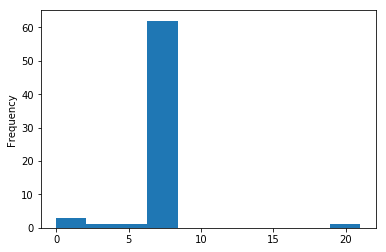

In [88]:
# Hist of logon times - normally in the morning at the start of the day but some significant outliers in the middle of the night.

ll = logon[logon['user'] == 'CSF0929']
lll= ll[ll['activity'] == 'Logon']
lll.hour.plot.hist()

Since he's a Production Line Worker, it's interestng why would he would be online at those hours. 

This made us look through his suspicious activity to figure out what he was up to.

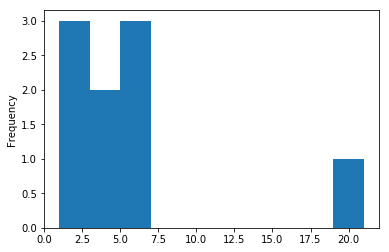

In [87]:
cc = cts[cts['user'] == 'CSF0929']
cc.hour.plot.hist()

In [59]:
# All device activity off hours by this user
device[(device.user == 'CSF0929') & ((device.hour < 6) | (device.hour > 20))]

,id,date,user,pc,activity,hour
52518,{V1J9-P7JR21ZY-0017JSES},7/1/2017 2:23,CSF0929,PC-4442,Connect,2
52519,{Q7Q0-F7FL92IO-3645ARQH},7/1/2017 3:53,CSF0929,PC-4442,Disconnect,3
52520,{O4Y3-X5SF91ZE-7867MGPF},7/1/2017 4:09,CSF0929,PC-4442,Connect,4
52521,{V6B0-T8YP88MD-6528ZNPI},7/1/2017 5:50,CSF0929,PC-4442,Disconnect,5
54825,{F9X7-E1CP85QD-3175HSBP},7/2/2017 21:57,CSF0929,PC-4442,Connect,21
54827,{V2Q2-P1JW27KX-4514LWVQ},7/2/2017 22:40,CSF0929,PC-4442,Disconnect,22
58753,{N6J8-T9UV76LX-9928WBKB},7/9/2017 1:07,CSF0929,PC-4442,Connect,1
58755,{T0R8-Z6OF30MJ-4136OHNN},7/9/2017 2:51,CSF0929,PC-4442,Disconnect,2
58757,{U7H9-L8SI56WF-6850MLWO},7/9/2017 5:12,CSF0929,PC-4442,Connect,5
58758,{R9C6-W2UF95VS-1863FCTY},7/9/2017 5:15,CSF0929,PC-4442,Disconnect,5


In [58]:
# All http data off hours by this user
offhourhttp[offhourhttp.user == 'CSF0929']

,activity,date,hour,id,pc,site,url,user
275994,NaN,7/1/2017 3:32,3,{D4G0-L1MD77CY-0097ZJPN},PC-4442,wikileaks.org,http://wikileaks.org/upload/maker.html,CSF0929
323028,NaN,7/14/2017 4:20,4,{L8D6-L5UN71HC-9011NFYE},PC-4442,wikileaks.org,http://wikileaks.org/upload/import.html,CSF0929
334334,NaN,7/16/2017 4:12,4,{D4G5-M1HQ54WN-2859PYMU},PC-4442,wikileaks.org,http://wikileaks.org/upload/source.html,CSF0929


## The Culprit

Clearly from the http links he was accessing at odd times, they're all the same website, **wikileaks.org** Furthermore, if you connect it to the device data directly above, you can clearly see that he is connecting to the computers at the same time as when he is on wikileaks.org which most likely means he's exploiting data. 

## WHO
### Chaney Sean Fuentes

## WHAT
### Leaking sensitive company information online (wikileaks.org) using an external device (i.e. USB)

## WHERE
### Uploaded info to wikileaks.org

## WHEN
### Off hours during the month of July (between 8pm - 2am), specically on dates 07/01, 07/14, and 07/16

## WHY
### Boeing -

From looking at this emails, we noticed he received an email from a Boeing contact in early May. Later, as we continued to investigate Chaney more, we saw that after he left the company, his name still appeared in the emails data set but as a foreign contact. There were emails being sent to 'Chaney.Sean.Fuentes@boeing.com' which was more suspicious. The person who was sending these emails was an employee named Suki Linda Odom, a Computer Programmer. We observed some suspicious behavior by her as well (connecting during off hours and sending emails with a lot of attachments to people like Chaney) but we were unable to draw any definitive conclusion pertaining her. 

However, we thought "why would Boeing hire Chaney if he was fired for leaking sensitive company info?". This lead us to our conclusion:

Chaney must have already had an offer lined up at Boeing (assuming because of the email he received from that Boeing contact in early May) so he didn't care too much about his current job. He would always be browsing online during work hours, which probably meant he wasn't too focused on work anyways. Then in July, a month before he switched to Boeing, since he hated his current job, he decided to exploit his current company before leaving. He must have waited until July to do so because he needed to wait until his job at Boeing was confirmed. Following all of this, he simply quit at this company.

In [82]:
# First email from Boeing to Chaney

email['people'] = email.to.apply(lambda t: t.split(';'))
email['non_dtaa'] = email.people.apply(lambda t: [i for i in t if i.split('@')[-1] != 'dtaa.com'])
email['num_non_dtaa'] = emails.non_dtaa.apply(len)
chaney = email[email['from'] == 'Chaney.Sean.Fuentes@dtaa.com'].sort_values('date')
chaney[chaney.num_non_dtaa > 0]

,id,date,to,from,size,attachments,people,non_dtaa,num_non_dtaa
24870,{X9M1-I4VL07HD-9561HBOC},05/13/2017 10:42:22,Joshua.Taylor.Sims@dtaa.com;Janna.Aretha.Woodw...,Chaney.Sean.Fuentes@dtaa.com,16890,0,"[Joshua.Taylor.Sims@dtaa.com, Janna.Aretha.Woo...",[Heather.Shannon.Velazquez@sbcglobal.net],1
27186,{K0I1-J3SQ23AO-8778BWPZ},05/14/2017 08:56:26,Martina.Christine.Petersen@dtaa.com;India.Kerr...,Chaney.Sean.Fuentes@dtaa.com,22780,1,"[Martina.Christine.Petersen@dtaa.com, India.Ke...",[India.Kerry.Hahn@juno.com],1
33625,{F4B4-H8EC86LV-8202UORU},05/18/2017 10:11:44,Jada.Joan.Mack@bellsouth.net,Chaney.Sean.Fuentes@dtaa.com,40716,1,[Jada.Joan.Mack@bellsouth.net],[Jada.Joan.Mack@bellsouth.net],1
53985,{U5K3-A8TN97JU-4458EGYD},05/27/2017 09:58:50,Pearl.Stella.Silva@dtaa.com;Reagan.Shafira.Cas...,Chaney.Sean.Fuentes@dtaa.com,36441,3,"[Pearl.Stella.Silva@dtaa.com, Reagan.Shafira.C...",[Quemby.Audrey.Mayo@boeing.com],1
58052,{N2E4-I0EJ34UF-8256PFGI},05/28/2017 13:38:04,Eugenia.Linda.Flynn@msn.com,Chaney.Sean.Fuentes@dtaa.com,29523,0,[Eugenia.Linda.Flynn@msn.com],[Eugenia.Linda.Flynn@msn.com],1
65237,{S4N2-N6RQ21LB-9749SSAF},06/02/2017 17:04:55,Nadine.Amelia.Briggs@msn.com,Chaney.Sean.Fuentes@dtaa.com,35007,0,[Nadine.Amelia.Briggs@msn.com],[Nadine.Amelia.Briggs@msn.com],1
82606,{M8Z7-I1ZR15DN-1211SVHP},06/10/2017 16:19:23,Wendy.Stacy.Norman@dtaa.com;Nadine.Amelia.Brig...,Chaney.Sean.Fuentes@dtaa.com,27753,4,"[Wendy.Stacy.Norman@dtaa.com, Nadine.Amelia.Br...","[Nadine.Amelia.Briggs@msn.com, Jada.Joan.Mack@...",2
89510,{L3P3-M4MG26YT-6786CGOT},06/15/2017 10:15:46,Nadine.Amelia.Briggs@msn.com,Chaney.Sean.Fuentes@dtaa.com,31758,0,[Nadine.Amelia.Briggs@msn.com],[Nadine.Amelia.Briggs@msn.com],1
127896,{L1T1-K7LG71ZF-0584AXRV},07/02/2017 12:49:40,Beau.Nathan.Brown@dtaa.com;India.Kerry.Hahn@ju...,Chaney.Sean.Fuentes@dtaa.com,17414,1,"[Beau.Nathan.Brown@dtaa.com, India.Kerry.Hahn@...",[India.Kerry.Hahn@juno.com],1
130089,{T6Z4-U6DZ18WA-2820CNLG},07/06/2017 09:33:33,Tanisha.Molly.Washington@dtaa.com;Sloane.Marth...,Chaney.Sean.Fuentes@dtaa.com,37937,2,"[Tanisha.Molly.Washington@dtaa.com, Sloane.Mar...",[Nadine.Amelia.Briggs@msn.com],1


In [99]:
## Emails to Chaney after moving to Boeing

email[email['to'].apply(lambda x: 'Chaney.Sean.Fuentes@boeing.com' in x)]

,id,date,to,from,size,attachments,people,non_dtaa,num_non_dtaa
181553,{N2P4-Z6GG86OX-6195MJZI},07/30/2017 08:33:54,Dorian.Samson.Randall@dtaa.com;Callie.Sierra.G...,Suki.Linda.Odom@dtaa.com,30100,0,"[Dorian.Samson.Randall@dtaa.com, Callie.Sierra...",[Chaney.Sean.Fuentes@boeing.com],1
185640,{G3G5-B4FL91HL-6913MGRC},08/02/2017 11:11:38,Kevyn.Frances.Brennan@dtaa.com;Tobias.Brady.Fl...,Isaiah.Hyatt.Talley@dtaa.com,28645,0,"[Kevyn.Frances.Brennan@dtaa.com, Tobias.Brady....",[Chaney.Sean.Fuentes@boeing.com],1
191161,{F6L7-E3EC59GH-1201UNWD},08/04/2017 10:59:24,Chaney.Sean.Fuentes@boeing.com,Suki.Linda.Odom@dtaa.com,24911,0,[Chaney.Sean.Fuentes@boeing.com],[Chaney.Sean.Fuentes@boeing.com],1
197487,{N6Q0-E8OV11FN-2075SGPF},08/06/2017 13:06:31,Callie.Sierra.Gates@dtaa.com;Ferris.Samuel.Wei...,Suki.Linda.Odom@dtaa.com,33280,0,"[Callie.Sierra.Gates@dtaa.com, Ferris.Samuel.W...","[Aurelia.Blair.Rhodes@gmail.com, Chaney.Sean.F...",2
201407,{M1V2-S9WN57WD-8025OVGW},08/09/2017 15:07:35,Callie.Sierra.Gates@dtaa.com;Tatyana.Kendall.G...,Suki.Linda.Odom@dtaa.com,20113,3,"[Callie.Sierra.Gates@dtaa.com, Tatyana.Kendall...","[Chaney.Sean.Fuentes@boeing.com, Carissa.Quinn...",2
205240,{C7E9-I3NW85EZ-0012FBAD},08/11/2017 08:20:58,Tatyana.Kendall.Gamble@dtaa.com;Mufutau.Elmo.L...,Suki.Linda.Odom@dtaa.com,31615,0,"[Tatyana.Kendall.Gamble@dtaa.com, Mufutau.Elmo...",[Chaney.Sean.Fuentes@boeing.com],1
217524,{Q0T6-Q7HC36ZF-0223EIRQ},08/17/2017 09:37:25,Mufutau.Elmo.Lara@dtaa.com;Chaney.Sean.Fuentes...,Suki.Linda.Odom@dtaa.com,30419,0,"[Mufutau.Elmo.Lara@dtaa.com, Chaney.Sean.Fuent...",[Chaney.Sean.Fuentes@boeing.com],1
234910,{S5U8-F7SW06NT-1908GXOT},08/25/2017 09:04:03,Chaney.Sean.Fuentes@boeing.com,Lamar.Hakeem.Conner@dtaa.com,23080,0,[Chaney.Sean.Fuentes@boeing.com],[Chaney.Sean.Fuentes@boeing.com],1
263427,{M4S0-L8SK00EI-5339YGPQ},09/09/2017 08:40:51,Tatyana.Kendall.Gamble@dtaa.com;Chaney.Sean.Fu...,Suki.Linda.Odom@dtaa.com,24361,0,"[Tatyana.Kendall.Gamble@dtaa.com, Chaney.Sean....",[Chaney.Sean.Fuentes@boeing.com],1
265237,{R7E3-H8GV74KM-7886UFSL},09/09/2017 14:49:20,Lacy.Nicole.Lindsey@northropgrumman.com;Chaney...,Suki.Linda.Odom@dtaa.com,20728,1,"[Lacy.Nicole.Lindsey@northropgrumman.com, Chan...","[Lacy.Nicole.Lindsey@northropgrumman.com, Chan...",2


In [92]:
# Encountering Suki Linda Odom - who is she? Is she relevant at all?
employee[employee.email == 'Suki.Linda.Odom@dtaa.com']
# Interesting that she is a programmer so she could have the capacity to hack the company data

,month,employee_name,user_id,email,role,supervisor
235,5/1/17,Suki Linda Odom,SLO0231,Suki.Linda.Odom@dtaa.com,ComputerProgrammer,Carl Scott Hooper
1214,6/1/17,Suki Linda Odom,SLO0231,Suki.Linda.Odom@dtaa.com,ComputerProgrammer,Carl Scott Hooper
2185,7/1/17,Suki Linda Odom,SLO0231,Suki.Linda.Odom@dtaa.com,ComputerProgrammer,Carl Scott Hooper
3149,8/1/17,Suki Linda Odom,SLO0231,Suki.Linda.Odom@dtaa.com,ComputerProgrammer,Carl Scott Hooper
4111,9/1/17,Suki Linda Odom,SLO0231,Suki.Linda.Odom@dtaa.com,ComputerProgrammer,Carl Scott Hooper
5069,10/1/17,Suki Linda Odom,SLO0231,Suki.Linda.Odom@dtaa.com,ComputerProgrammer,Carl Scott Hooper
6016,11/1/17,Suki Linda Odom,SLO0231,Suki.Linda.Odom@dtaa.com,ComputerProgrammer,Carl Scott Hooper


So she wasn't fired but she is also a Computer Programmer who would have the capacity to hack into the computers, etc. 

What about her connects though? Any other noteable suspicious behavior?

In [100]:
# Suki's off hour connects
cts[cts.user == 'SLO0231'].sort_values('date')

,id,date,user,pc,activity,hour
11308,{S9D2-A8OY58YE-5974IPEU},5/13/2017 23:20,SLO0231,PC-3694,Connect,23
17488,{U1K6-I4RD55DG-2839GCDU},5/21/2017 2:40,SLO0231,PC-3694,Connect,2
77234,{B4O9-E2KE28DF-1173IMRO},7/30/2017 5:15,SLO0231,PC-3694,Connect,5
98411,{X3H1-K4OD09NF-8965SSSD},8/24/2017 2:07,SLO0231,PC-3694,Connect,2
107825,{U7X8-K4BS03GD-5880URXM},9/2/2017 22:13,SLO0231,PC-3694,Connect,22
110589,{V6O9-L8CG71MX-9794JNIT},9/8/2017 3:08,SLO0231,PC-3694,Connect,3


Of this off hour connections data, the last 4 were after Chaney both left the company and joined Boeing. This could mean that she was a connection he had during his time at DTAA and someone who might still be up to some sketchy business.

The 4 last dates cross-checked against the emails that Chaney received from her at his Boeing adress, also have some correlation. Following her 7/30/17 connection at ~5am, she emailed Chaney the same day at 8am. And then on 09/09/17, she sent 2 emails to Chaney, one which also contained another external recipient - Lacy.Nicole.Lindsey@northropgrumman.com and this was a day after she was connecting at 3am on 09/08/17. These findings suggest that Suki may have had some involvement in Chaney's plans (or future plans) or be a secondary suspect for a future attack if she hasn't already done something yet. 